# Regression

## Exploratory Data Analysis

In [1]:
# http://localhost:8889/notebooks/22-Deep%20Learning/TensorFlow_FILES/ANNs/01-Keras-Regression.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Sergi\Desktop\Data_Science\22-Deep Learning\TensorFlow_FILES\DATA\kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull() # if something is missing it will return True

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum() # here we can check also if there is any null value in the columns. 
# True are 0 and False would be 1. How many Trues there are.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


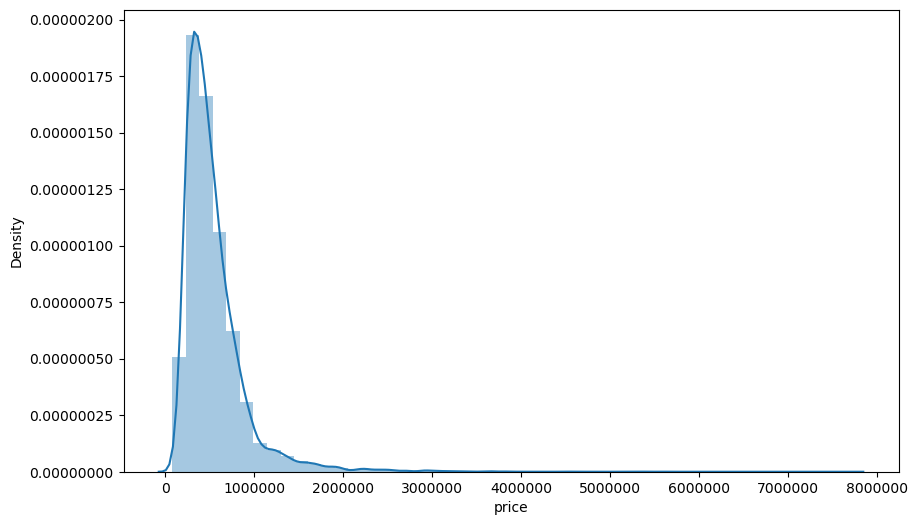

In [7]:
plt.figure(figsize=(10,6))
# df["price"]=df["price"].astype(int)
sns.distplot(df['price'])
plt.ticklabel_format(style='plain')

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

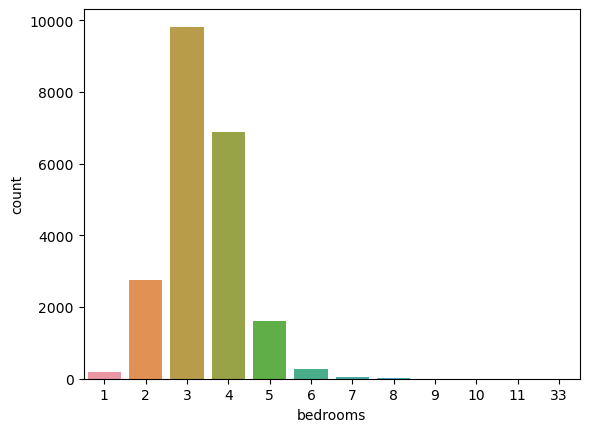

In [8]:
sns.countplot(data=df, x='bedrooms')

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

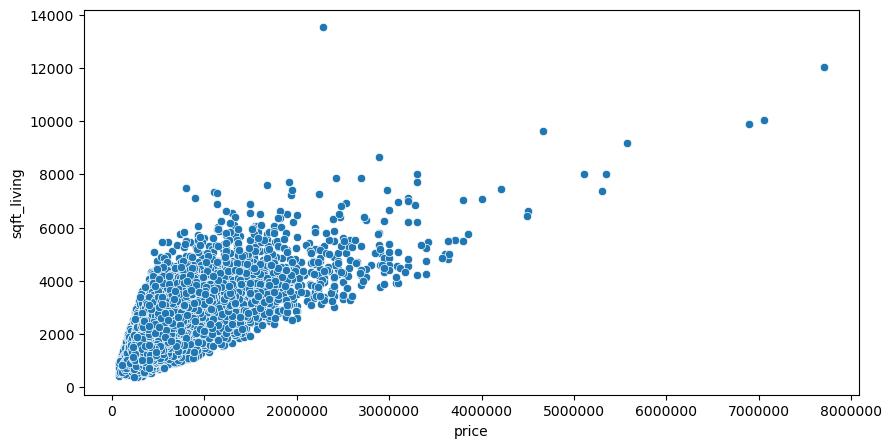

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living', data=df)
plt.ticklabel_format(style='plain') # to get absolute values if both axis from the plot are numerical

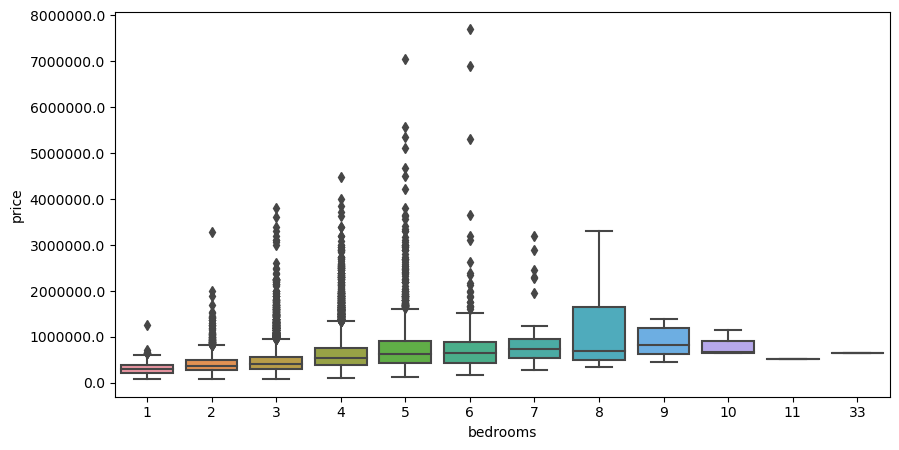

In [51]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='bedrooms',y='price', data=df)
ax.set_yticklabels(ax.get_yticks()) # to get absolute values if there is a categorical axis in the plot
plt.show()

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

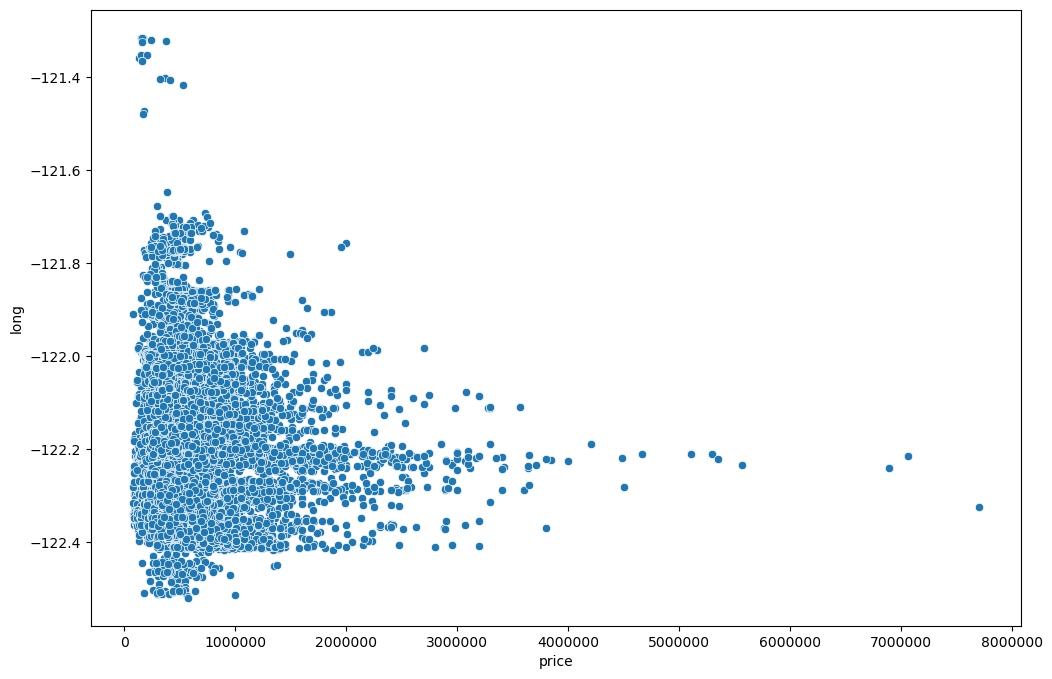

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)
plt.ticklabel_format(style='plain')

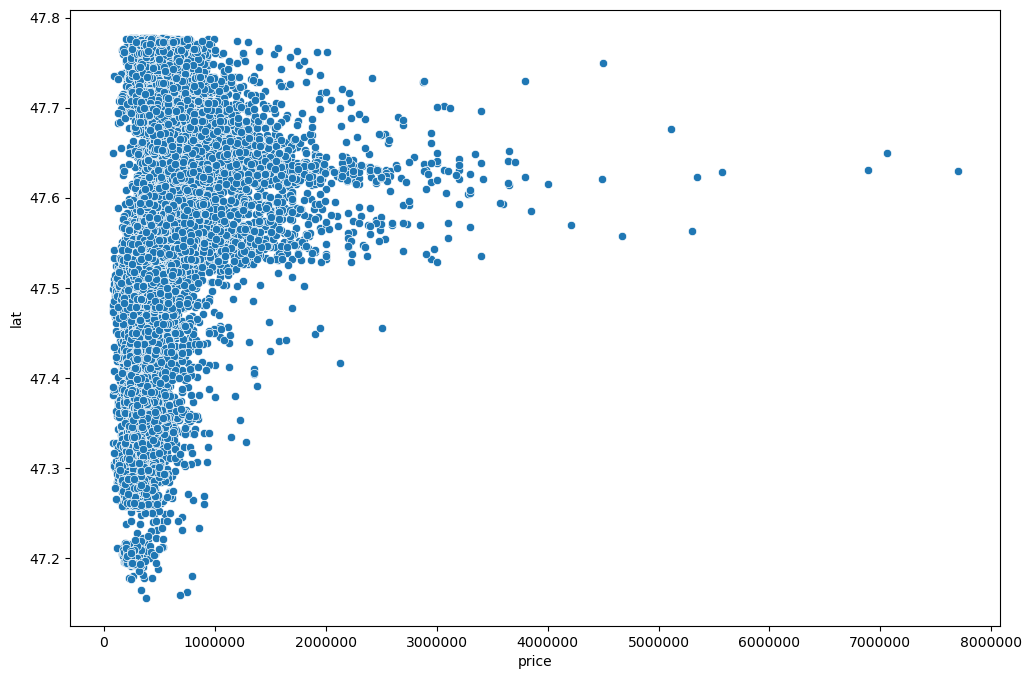

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)
plt.ticklabel_format(style='plain')

In [18]:
import webbrowser
url = 'https://external-preview.redd.it/fZmGYFgau-vYmtLOixJRvrwMsM3W6_np7T-6qVI29mI.png?auto=webp&v=enabled&s=ef70ff925bf5e2bbbc72da81f713a46dfc265041'
webbrowser.open(url)

True

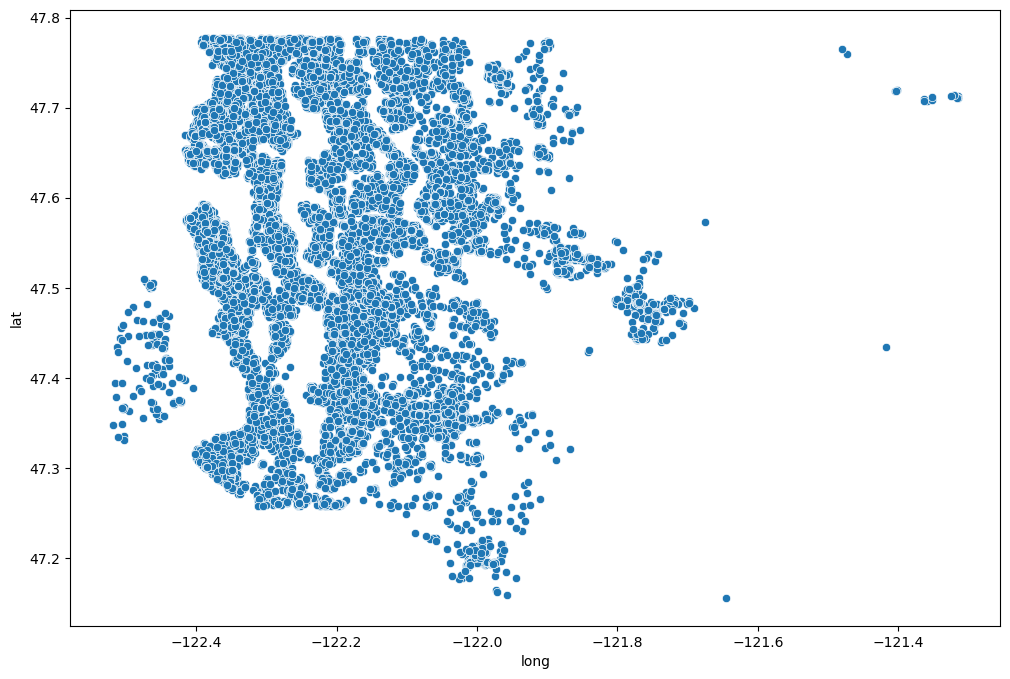

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat', data=df)
plt.ticklabel_format(style='plain')

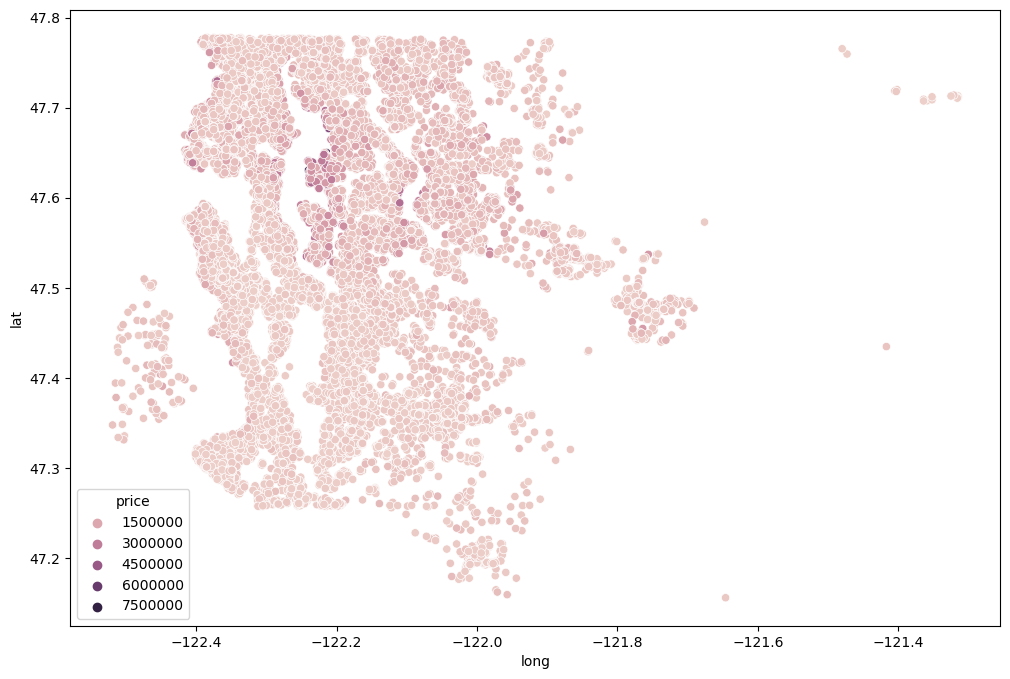

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat', data=df, hue='price')
plt.ticklabel_format(style='plain')

In [22]:
# clean outliers
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [23]:
len(df)

21597

In [24]:
len(df)*0.01 #this is the 1% of the total houses

215.97

In [25]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:] # droping 1% of information the really expensive houses

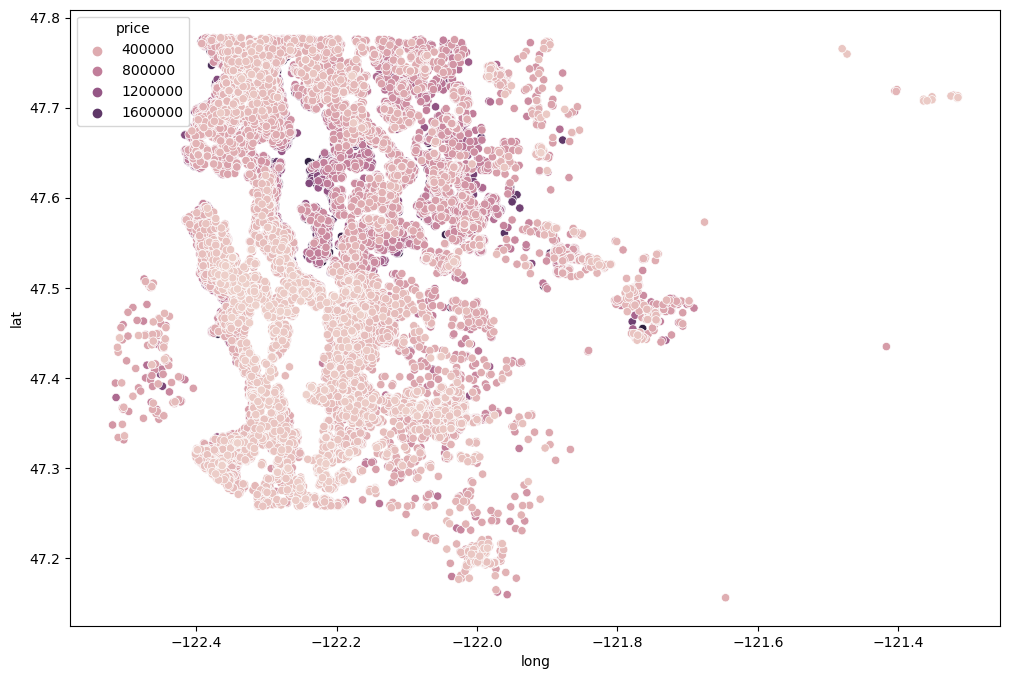

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat', data=non_top_1_perc, hue='price')
plt.ticklabel_format(style='plain')

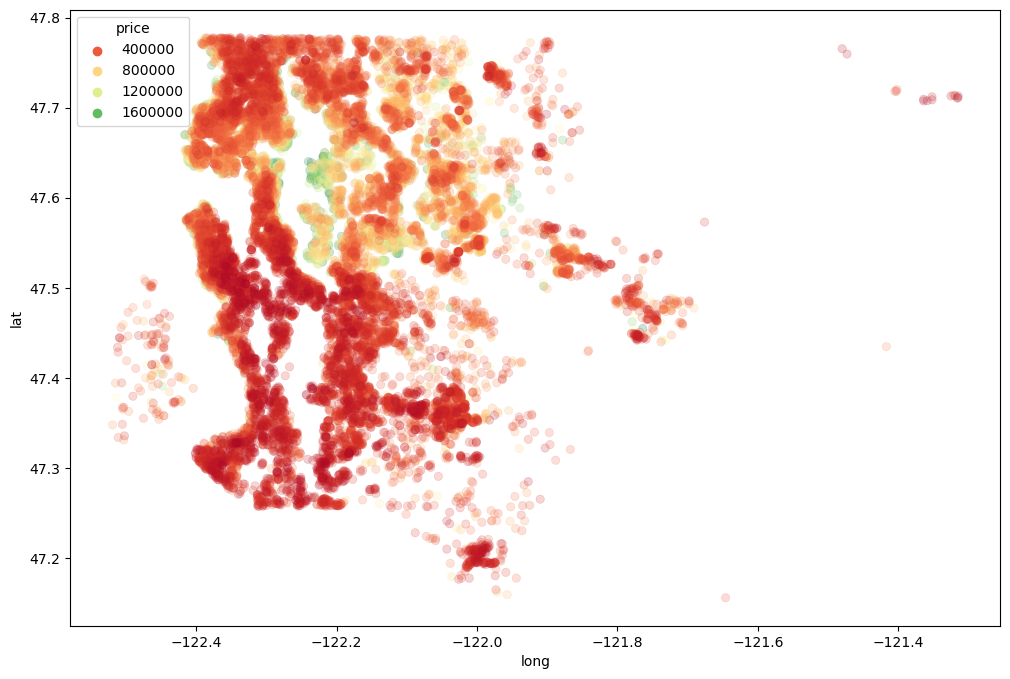

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat', data=non_top_1_perc, hue='price', edgecolor= None, alpha=0.2, palette='RdYlGn')
plt.ticklabel_format(style='plain')

<AxesSubplot: xlabel='waterfront', ylabel='price'>

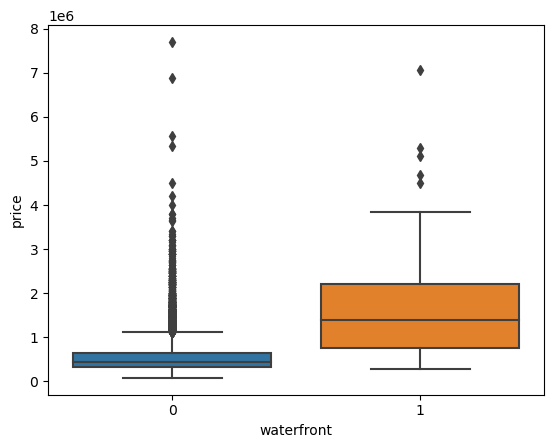

In [30]:
sns.boxplot(x='waterfront', y='price', data=df)
#if the houses are in the waterfront are more expensive.. this makes sense

## Featuring Engineering

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
df = df.drop('id',axis=1)

In [33]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [34]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [35]:
df['year'] = df['date'].apply(lambda x: x.year)

In [36]:
df['month'] = df['date'].apply(lambda x: x.month)

In [37]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


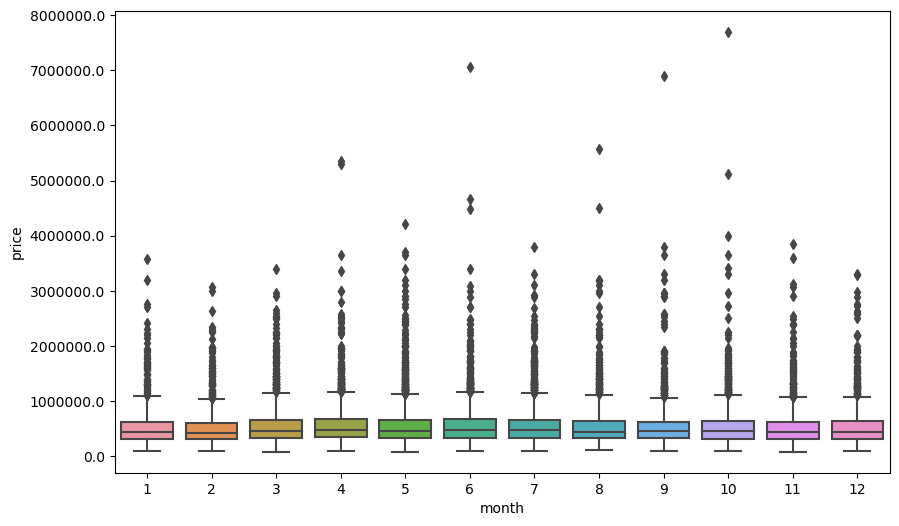

In [52]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x='month',y='price',data=df)
ax.set_yticklabels(ax.get_yticks())
plt.show()

In [53]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot: xlabel='month'>

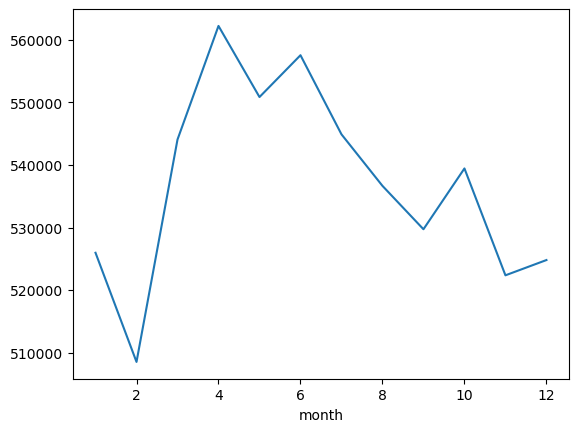

In [54]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot: xlabel='year'>

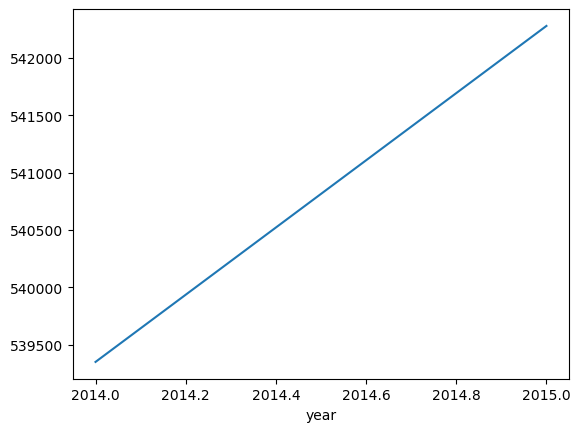

In [55]:
df.groupby('year').mean()['price'].plot()

In [56]:
df = df.drop('date',axis=1)

In [57]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [58]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [59]:
# zipcode is really categorical, not numerical

df['zipcode'].value_counts() # we have 70 categories of zipcodes.. so too many categories

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [60]:
df = df.drop('zipcode', axis=1)

In [61]:
df['yr_renovated'].value_counts() #0 is no renovated.. so we could set the rest as 1, as renovated

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [62]:
# The higher year renovated (most recent), the higher sale price. 
# And since zero actually follows along with this correlation, it's almost like the lowest year possible.
# Then we should expect that to also have a little value.
# So in this case, we're actually kind of lucky and due to the scaling from zero to the highest year,
# higher should correlate with more value.

# The more recent a renovation, just intuitively, you expect that to have more value.
# So we can keep this as is.

In [63]:
df['sqft_basement'].value_counts() #similar situation than yr_renovated, because 0 means there is no basement there.

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [65]:
# These also basically make sense as a continuous variable because we would expect that if there is
# no basement, it would have less value than having an extremely large basement.
# It can also keep this as is.

# A lot of times you'll have to make the decision in feature engineering if you want to make a continuous
# variable as categorical or just keep it as continuous.

# So, for these two, it's not a crazy assumption to keep them as continuous and leave these zeros as
# kind of your bottom marker.

## Scale and Create the model

In [68]:
X = df.drop('price', axis=1).values  
y = df['price'].values
# make sure of is that you call values here because a TensorFlow may complain
# if you don't pass in a numeric array because it can't work with Pandas series or data frames that well.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [74]:
X_train = scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
X_train.shape

(15117, 19)

In [79]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu')) 
                
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [80]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

# As a new step here, we are adding in validation data during the fitting as well as choosing a batch size:

# we're training on X train, Y train, but as we go along, we want
# to be checking against our test set and that will give us some nice plots to realize whether
# or not we're overfitting.

# Because this is a larger data set, we're going to feed in our data in batches.
# It's very typical to do batch sizes in powers of two, so 64 128 256.
# The smaller the batch size, the longer training is going to take, but the less likely you're going
# to fit to your data because you're not passing in your entire training set at once.

# Finally, we choose an arbitrary, large number of epochs.

# This test data will not actually affect the weights or biases of our network.
# Keras isn't going to update your model based off the test data or validation data.
# Instead, it will only use the training data as it's updating the weights and biases and continue to
# check how well it's doing or not just the training data, but also the validation data.

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430234959872.0000 - val_loss: 418882813952.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428710756352.0000 - val_loss: 413545398272.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 406860857344.0000 - val_loss: 363859902464.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 306193170432.0000 - val_loss: 211703152640.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 149391245312.0000 - val_loss: 100954398720.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 99800727552.0000 - val_loss: 94787534848.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97057210368.0000 - val_loss: 93170180096.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95298248704.0000 - val_loss: 91579858944.0000
Epoch 9/400
119/119 [=

119/119 [==============================] - 0s 2ms/step - loss: 37187584000.0000 - val_loss: 35896664064.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 37043609600.0000 - val_loss: 35733426176.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36917829632.0000 - val_loss: 35575713792.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36755554304.0000 - val_loss: 35522781184.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36576882688.0000 - val_loss: 35282587648.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 36444884992.0000 - val_loss: 35157639168.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36350283776.0000 - val_loss: 35006685184.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36195356672.0000 - val_loss: 34894499840.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32542261248.0000 - val_loss: 30955995136.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32516782080.0000 - val_loss: 30924537856.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32457750528.0000 - val_loss: 30894223360.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32420253696.0000 - val_loss: 30827261952.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32455202816.0000 - val_loss: 30882545664.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32400910336.0000 - val_loss: 30767300608.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32382949376.0000 - val_loss: 30737506304.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32327985152.0000 - val_loss: 30790238208.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31180916736.0000 - val_loss: 29269463040.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31159064576.0000 - val_loss: 29299955712.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31166513152.0000 - val_loss: 29224880128.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31168288768.0000 - val_loss: 29208379392.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31092213760.0000 - val_loss: 29254993920.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31075827712.0000 - val_loss: 29169035264.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31091228672.0000 - val_loss: 29207310336.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31055040512.0000 - val_loss: 29146404864.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30313150464.0000 - val_loss: 28300044288.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30322132992.0000 - val_loss: 28239431680.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30292897792.0000 - val_loss: 28265570304.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30282475520.0000 - val_loss: 28226605056.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30267535360.0000 - val_loss: 28177020928.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30279940096.0000 - val_loss: 28197345280.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30261866496.0000 - val_loss: 28141830144.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30265057280.0000 - val_loss: 28147849216.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29597956096.0000 - val_loss: 27325331456.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29571735552.0000 - val_loss: 27235631104.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29560776704.0000 - val_loss: 27253409792.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 29540712448.0000 - val_loss: 27227117568.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29532082176.0000 - val_loss: 27347767296.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29526818816.0000 - val_loss: 27203282944.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29495707648.0000 - val_loss: 27169105920.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29487409152.0000 - val_loss: 27134425088.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28919173120.0000 - val_loss: 26582859776.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 28890947584.0000 - val_loss: 26511753216.0000


## Model evaluation and predictions

In [81]:
# Now, we will explore an evaluation on not just our test data, but also being able to predict the
# price of a new house given its features.

In [82]:
model.history.history

{'loss': [430234959872.0,
  428710756352.0,
  406860857344.0,
  306193170432.0,
  149391245312.0,
  99800727552.0,
  97057210368.0,
  95298248704.0,
  93523091456.0,
  91700731904.0,
  89791586304.0,
  87866908672.0,
  85848924160.0,
  83791904768.0,
  81590059008.0,
  79363719168.0,
  76984074240.0,
  74509508608.0,
  71962230784.0,
  69407326208.0,
  66809090048.0,
  64246775808.0,
  61788971008.0,
  59493355520.0,
  57454927872.0,
  55701626880.0,
  54204440576.0,
  52953346048.0,
  51913146368.0,
  51019440128.0,
  50205798400.0,
  49477369856.0,
  48860184576.0,
  48276848640.0,
  47676657664.0,
  47184580608.0,
  46667620352.0,
  46179905536.0,
  45749714944.0,
  45298843648.0,
  44859981824.0,
  44442812416.0,
  44060291072.0,
  43649097728.0,
  43311509504.0,
  42959966208.0,
  42602467328.0,
  42243481600.0,
  41906495488.0,
  41606975488.0,
  41306550272.0,
  40994349056.0,
  40717164544.0,
  40407228416.0,
  40172871680.0,
  39894474752.0,
  39590764544.0,
  39365881856.0,
 

In [83]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302350e+11,4.188828e+11
1,4.287108e+11,4.135454e+11
2,4.068609e+11,3.638599e+11
3,3.061932e+11,2.117032e+11
4,1.493912e+11,1.009544e+11
...,...,...
395,2.894861e+10,2.653168e+10
396,2.891160e+10,2.648652e+10
397,2.889243e+10,2.662659e+10
398,2.891917e+10,2.658286e+10


<AxesSubplot: >

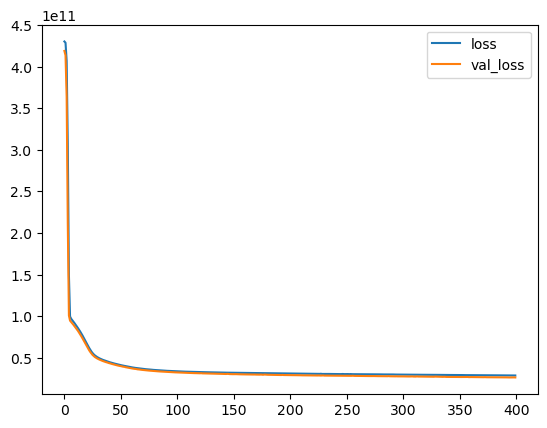

In [85]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [86]:
# With the plot we can compare the plot behavior of my blue training loss versus my orange validation loss.
# There's decrease in both the training loss and the validation loss.
# There is no increase so far in the validation set.
# So this means we could have continued training.

In [87]:
# In the model fit, the tail end (lasts epochs) we're actually not improving that much.
# After 400 epochs, it looks like we're kind of hovering around this particular loss value and the
# decreasing is happening much slower.
# But because the validation loss is also going down, that's an indicator that we could continue training
# without overfitting to our training data.

# On the other hand, if we saw the orange line begin to spike going up after some of these epochs,
# means we're overfitting to the training data because now we have a much larger loss on the validation data. 

# In this case, is the perfect behavior you want to see. You want to see training loss and validation loss 
# go down and then continue down together. So there's no overfitting that we can see occurring here.


In [88]:
#Evaluation on test data:

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [89]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [90]:
mean_squared_error(y_test,predictions)

26511751652.417896

In [91]:
np.sqrt(mean_squared_error(y_test,predictions)) # to get the RMSE

162824.29687370954

In [92]:
mean_absolute_error(y_test,predictions)

101647.8504900897

In [93]:
# The MAE is easy to interpret because ti gives you the average absolute error across all our predictions. 
# On average, we're off by about 100,000. Is that good or is that bad? We need to take into account the actual dataframe itself.

In [94]:
# So we have to take into account our price column off the original dataframe call, describe on it and
# see what kind of values we're actually dealing with.

df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [96]:
# mean
5.402966e+05

540296.6

In [97]:
# The average price of the house is around 540,000.
# In our case, our mean absolute error is about 100,000. So that's not really that great, we're off by around 20%.

In [98]:
# We can use an explained variance score to try to get a deeper understanding of our evaluation:

explained_variance_score(y_test,predictions) # Best possible score is 1.0, lower values are worse.

0.800396578831994

In [99]:
# 0.8 is ok, but it really depends on the context. we have a previous model that actually performs better than this.

In [100]:
# We could still keep training and keep lowering loss, because we haven't reached overfitting in the last plot yet.

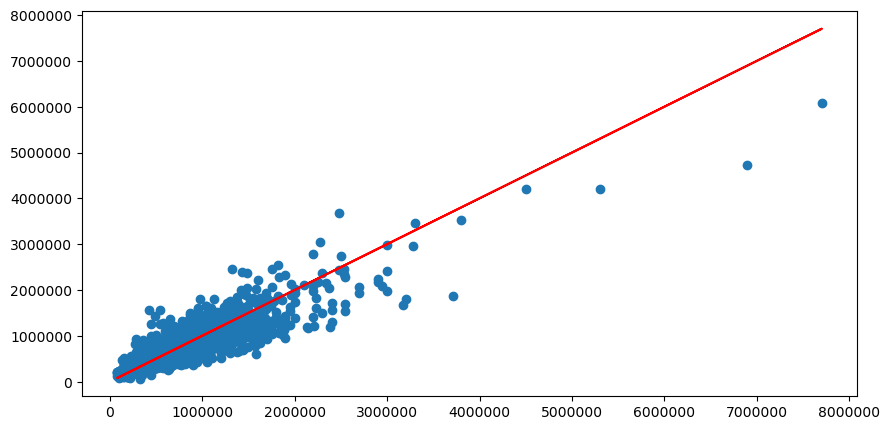

In [106]:
# We can also compare is our predictions and we can plot them out against a perfect fit:
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r') #red line represents the best or the basically the perfect prediction line
plt.ticklabel_format(style='plain')

In [107]:
# being punished by the outliers (really expensive houses), we're actually not good at predicting the price, but we're pretty
# good at predicting the prices of houses between zero and $2 million.

# There's a good fit between our test and our predictions, and that's explained by variance score in a single number.
# Maybe worth it is to retrain our model just on that bottom 99% of houses

# If we come up to a situation where our maybe sale price is over $3 Million, we'll just say, 
# sorry, our model's not good enough for this and we'll only refit to that bottom 99%

In [108]:
# Use our model to predict on a brand new house:

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [109]:
df.drop('price', axis=1).iloc[0] # as an example we grab the first house of the list

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [110]:
single_house = df.drop('price', axis=1).iloc[0]

In [111]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [112]:
single_house.values.reshape(-1,19)

# We need to reshape to be -1, 19, essentially adds an extra set of brackets, which is the shape expected. 
# Negative one just means keep those old dimensions along that axes. Now we are able to scale and transform.

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [113]:
scaler.transform(single_house.values.reshape(-1,19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [114]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [115]:
model.predict(single_house)

1/1 [==============================] - 0s 22ms/step


array([[289108.]], dtype=float32)

In [117]:
df.head(1) 

# Here we can compare the original price of the house in the df vs the prediction of the house in the last cell.
# So, the true price is 221,000 and I'm predicting it will sell at 289,000
# It looks like we are kind of overshooting here.
# That may be an issue when we're trying to fit to the extreme values (outliers)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [119]:
# A next step could be to retrain the model by dropping out the top 1 or 2% of values and see 
# if that can reduce the mean squared error on the data set.

# In resume, we're relatively in the range of what a house could sell at, and it looks like we're more
# or less explaining a bit of variance, up to 80% of the variance in the pricing.